In [1]:
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision.transforms import v2

import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import numpy as np

import json
from tqdm import tqdm
from PIL import Image

plt.style.use('seaborn-v0_8-dark-palette')

#### Write simple model for example

In [2]:
class MyModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input, 128),
            nn.ReLU(),
            nn.Linear(128, output)
        )

    def forward(self, x):
        return self.model(x)

In [3]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-1)

In [4]:
input = torch.rand([16, 784], dtype=torch.float32)

out = model(input)
out.shape

torch.Size([16, 10])

#### LR Scheduler

<b>LR_scheduler</b> - need for auto changing learning rate during model training.<br>
Let's see on different LR_scheduler's!

#### Lambda LR

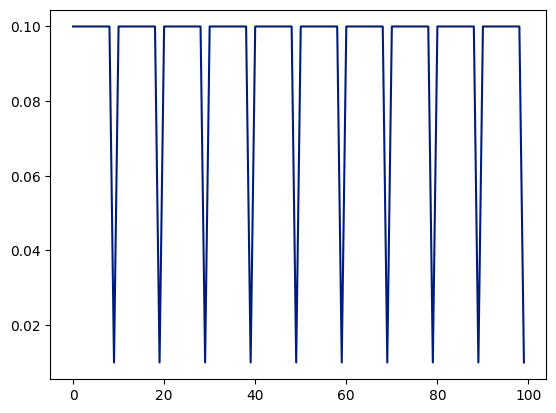

In [5]:
# set lr change with function
lr_lambda = lambda step: 0.1 if step % 10 == 0 else 1
# every scheduler hsve it's own counter - step, which work on every optimizer step() method called.
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda=lr_lambda)

list_ = []
for epoch in range(100):
    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()


    # Validation
        # forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)


plt.plot(list_)
plt.show()

#### MultiStep LR

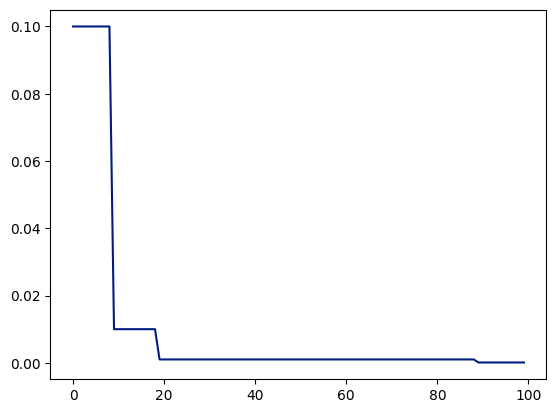

In [6]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-1)

# milestones - iterations - in this iterations lr will change!
# gamma - lr speed
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10, 20, 90], gamma=0.1)

list_ = []
for epoch in range(100):
    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()


    # Validation
        # forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)


plt.plot(list_)
plt.show()

#### Step LR

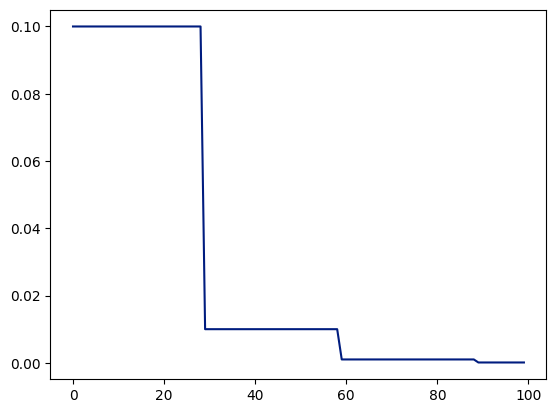

In [7]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-1)

# step_size - step of lr changing
# gamma - lr speed
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

list_ = []
for epoch in range(100):
    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()


    # Validation
        # forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)


plt.plot(list_)
plt.show()

#### Exponential LR

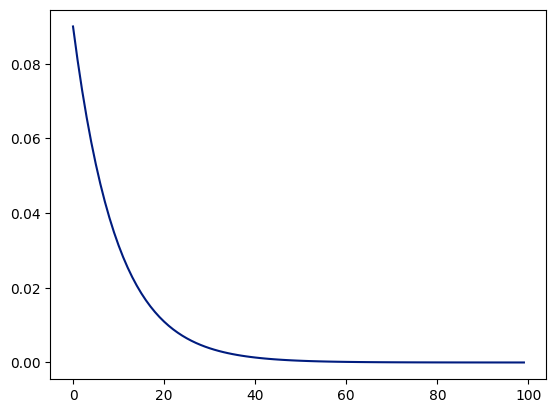

In [8]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-1)

# it's all clear from name
# gamma - lr speed
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

list_ = []
for epoch in range(100):
    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()


    # Validation
        # forward pass

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)


plt.plot(list_)
plt.show()

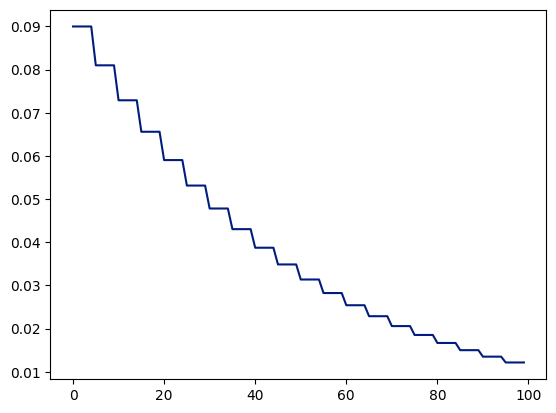

In [9]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-1)

# another exponential example
# gamma - lr speed
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

list_ = []
for epoch in range(100):
    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()


    # Validation
        # forward pass
    # we can call optimizer not every epoch
    if epoch % 5 == 0:
        lr_scheduler.step()
    lr = lr_scheduler.get_last_lr()
    list_.append(lr)


plt.plot(list_)
plt.show()

#### ReduceLROnPlateu

In [10]:
model = MyModel(784, 10)

loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-1)

lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=opt, # optimizer
    mode='min', # define, what we check(max/min) in attended parameter(it can be loss, optimizer or etc)
    factor=0.1, # lr speed
    patience=10, # count epochs without improving
    threshold=1e-4, # threshold on what attended parameter must change
    threshold_mode='rel', # 'rel' - param must change on threshold percents, 'abs' - param must change only on threshold
    cooldown=0, # periods of waiting to lr comes to min
    min_lr=0, # min lr speed
    eps=1e-8 # min different between new and old lr
)

In [11]:
loss = torch.full([5, 10], 0.1)
loss = loss * torch.tensor([1/i for i in range(1, 6)]).reshape([5, 1])
loss = loss.reshape([50])

In [12]:
list_ = []

for epoch in range(50):
    # train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # validation
        # forward pass

    # whatch loss
    idx = epoch
    lr_scheduler.step(loss[idx])

    lr = lr_scheduler._last_lr[0]
    list_.append(lr)

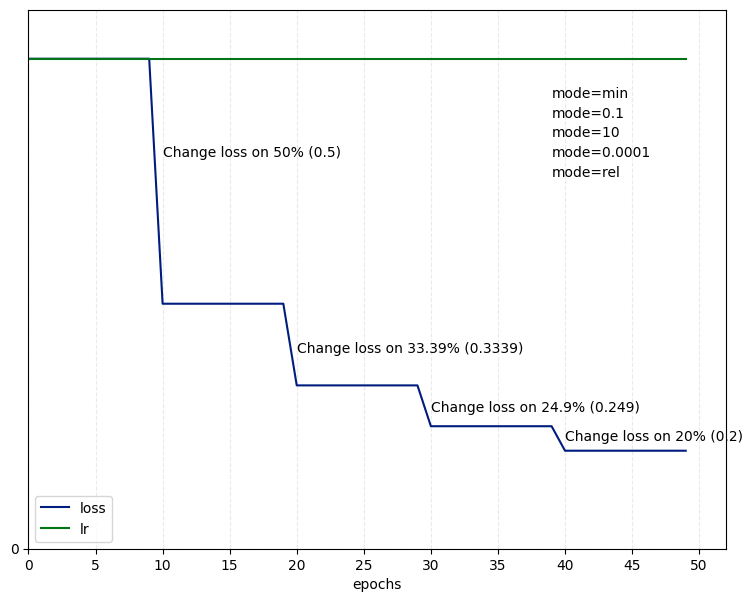

In [13]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(loss)
ax.plot(list_)

ax.set_xlim(0, 52)
ax.set_ylim(0, 0.11)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.4)
ax.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.3)

ax.legend(['loss', 'lr'])
ax.set_xlabel('epochs')

if lr_scheduler.threshold_mode == 'abs':
    ax.text(10, 0.08, 'Change loss on 0.05')
    ax.text(20, 0.04, 'Change loss on 0.0167')
    ax.text(30, 0.028, 'Change loss on 0.008')
    ax.text(40, 0.022, 'Change loss on 0.005')
else:
    ax.text(10, 0.08, 'Change loss on 50% (0.5)')
    ax.text(20, 0.04, 'Change loss on 33.39% (0.3339)')
    ax.text(30, 0.028, 'Change loss on 24.9% (0.249)')
    ax.text(40, 0.022, 'Change loss on 20% (0.2)')

ax.text(39, 0.092, f'mode={lr_scheduler.mode}')
ax.text(39, 0.088, f'mode={lr_scheduler.factor}')
ax.text(39, 0.084, f'mode={lr_scheduler.patience}')
ax.text(39, 0.080, f'mode={lr_scheduler.threshold}')
ax.text(39, 0.076, f'mode={lr_scheduler.threshold_mode}')


plt.show()